### **HEART PREDICTION COMPARISON **

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
# reading data
url= "https://raw.githubusercontent.com/Abhijat-M/data/main/heart_failure_clinical_records_dataset%20(1).csv"
data = pd.read_csv(url)

In [3]:
data.head()
data.describe()
data.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [4]:
# Checking if data set contains empty value
data.isna().values.any()

False

In [5]:
# Checking if data set contains inf value
np.isinf(data).values.any()

False

<AxesSubplot: >

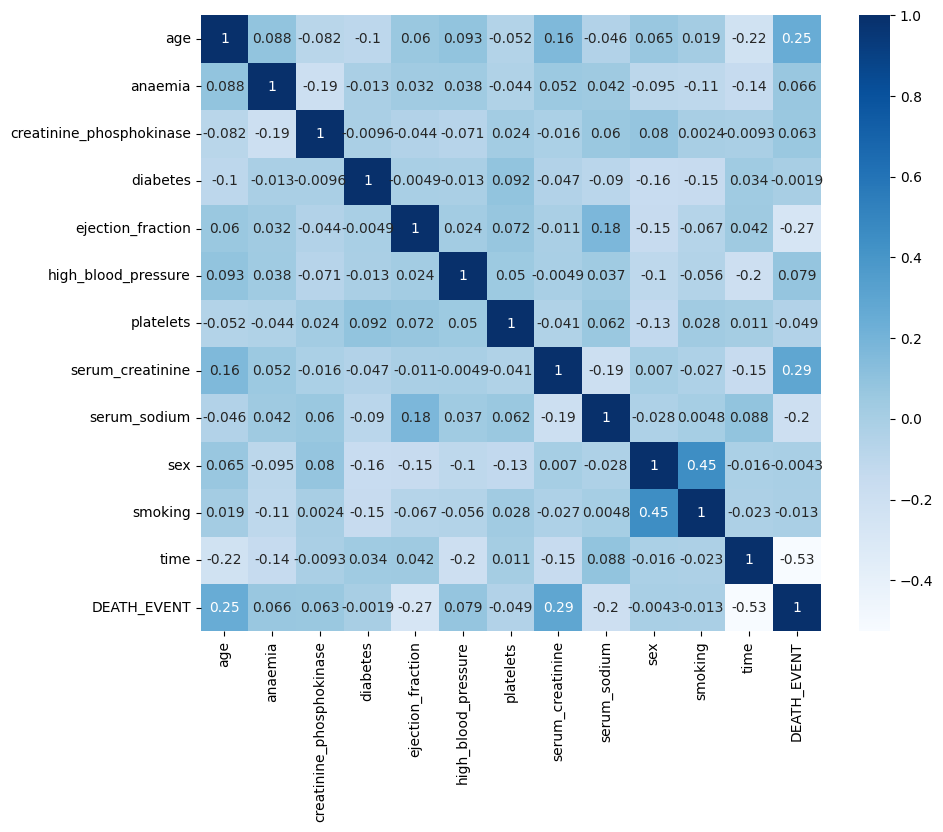

In [6]:
plt.figure(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='Blues')

In [7]:
import plotly.graph_objs as go
labels = ['Death','Survived']
died_yes = data[data['DEATH_EVENT']==1]
died_no = data[data['DEATH_EVENT']==0]
values = [len(died_no), len(died_yes)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Death ratio")
fig.show()

ModuleNotFoundError: No module named 'plotly'

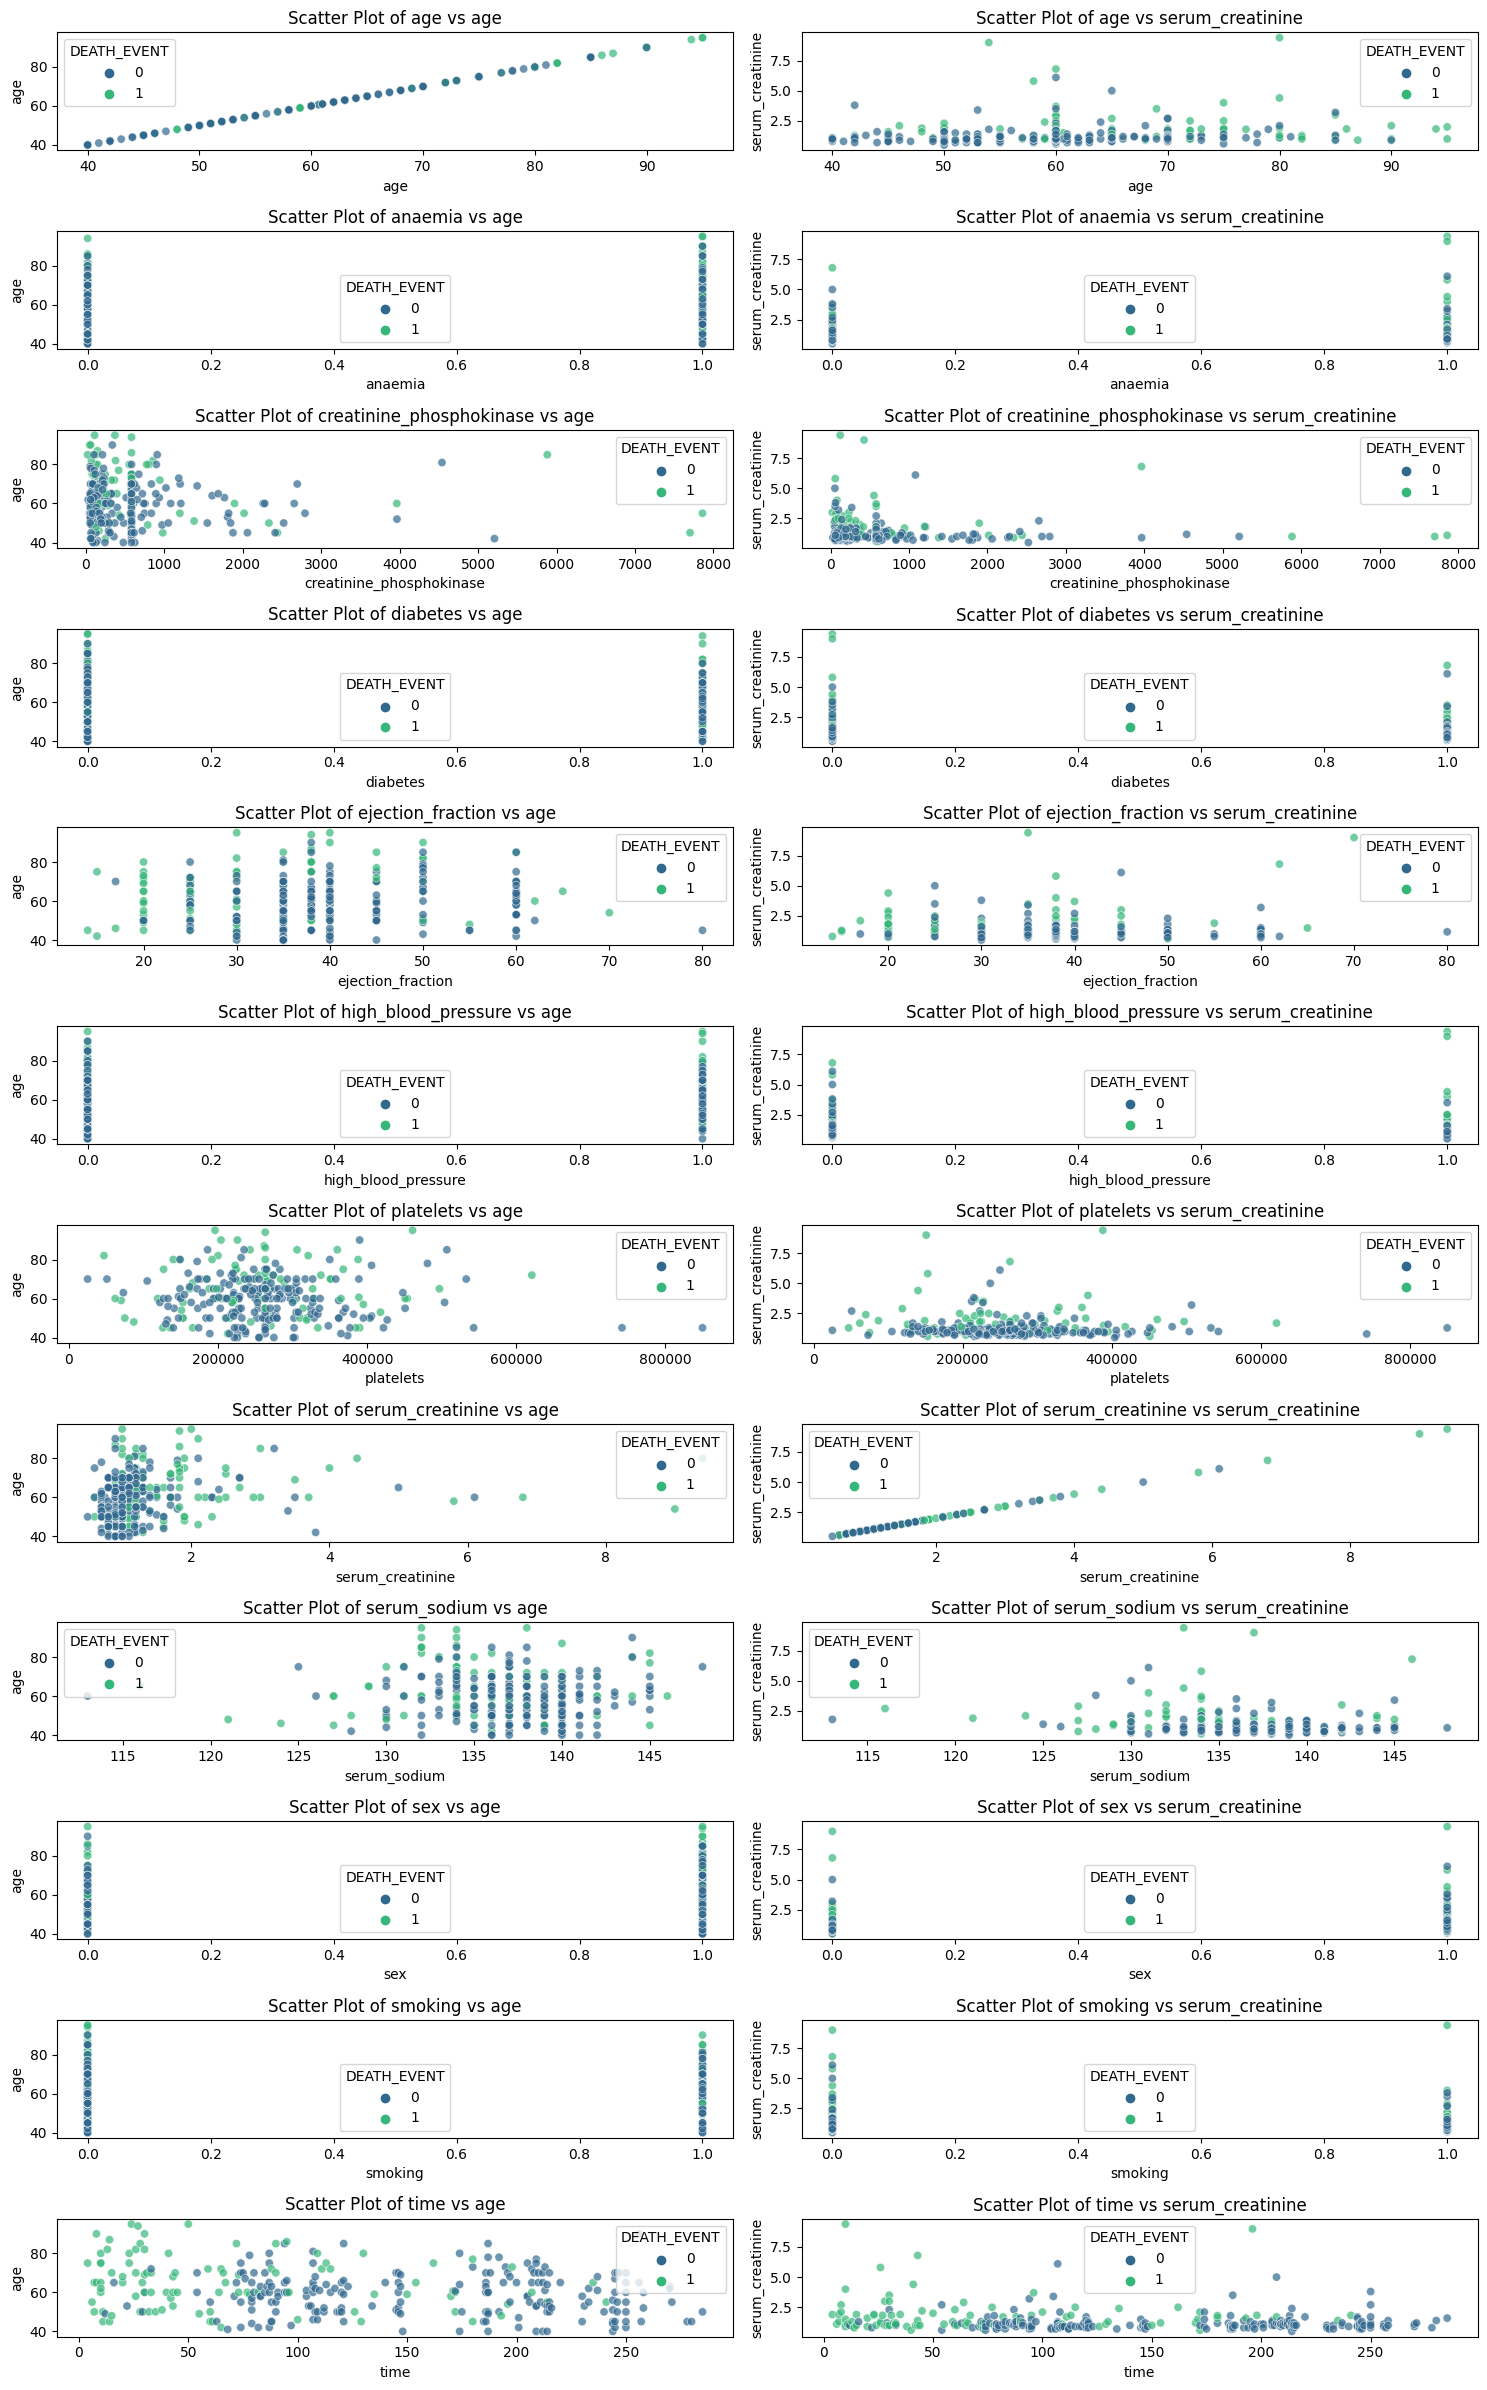

In [8]:
selected_features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']
# Set up subplots
fig, axes = plt.subplots(nrows=len(selected_features), ncols=2, figsize=(15, 2 * len(selected_features)))
# Plot scatter plots for each feature against 'DEATH_EVENT'
for i, feature in enumerate(selected_features):
    # Scatter plot for feature vs 'DEATH_EVENT' (0)
    sns.scatterplot(x=feature, y='age', hue='DEATH_EVENT', data=data, ax=axes[i, 0], palette='viridis',
    alpha=0.7)
    axes[i, 0].set_title(f'Scatter Plot of {feature} vs age')
    axes[i, 0].set_xlabel(feature)
    axes[i, 0].set_ylabel('age')
    # Scatter plot for feature vs 'DEATH_EVENT' (1)
    sns.scatterplot(x=feature, y='serum_creatinine', hue='DEATH_EVENT', data=data, ax=axes[i, 1],
    palette='viridis', alpha=0.7)
    axes[i, 1].set_title(f'Scatter Plot of {feature} vs serum_creatinine')
    axes[i, 1].set_xlabel(feature)
    axes[i, 1].set_ylabel('serum_creatinine')

# Adjust layout
plt.tight_layout()
plt.show()

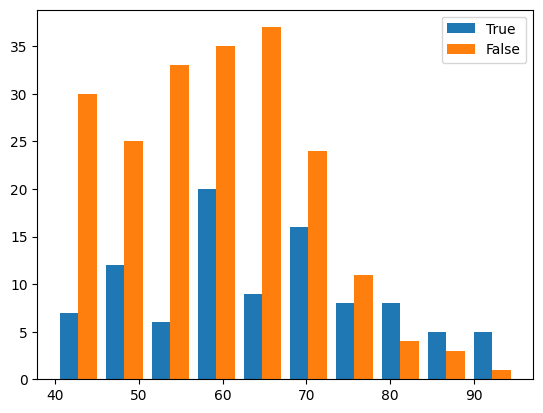

In [9]:
# Checking at which age the death event most often occurs

death_events = data.DEATH_EVENT.unique()
plt.hist([data.loc [data.DEATH_EVENT == e, 'age'] for e in death_events])
plt.legend(death_events.astype('bool'))

C:\Users\abhijat\AppData\Local\Temp\ipykernel_8540\1361837002.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax = ax)


array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'anaemia'}>,
        <AxesSubplot: title={'center': 'creatinine_phosphokinase'}>,
        <AxesSubplot: title={'center': 'diabetes'}>],
       [<AxesSubplot: title={'center': 'ejection_fraction'}>,
        <AxesSubplot: title={'center': 'high_blood_pressure'}>,
        <AxesSubplot: title={'center': 'platelets'}>,
        <AxesSubplot: title={'center': 'serum_creatinine'}>],
       [<AxesSubplot: title={'center': 'serum_sodium'}>,
        <AxesSubplot: title={'center': 'sex'}>,
        <AxesSubplot: title={'center': 'smoking'}>,
        <AxesSubplot: title={'center': 'time'}>],
       [<AxesSubplot: title={'center': 'DEATH_EVENT'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

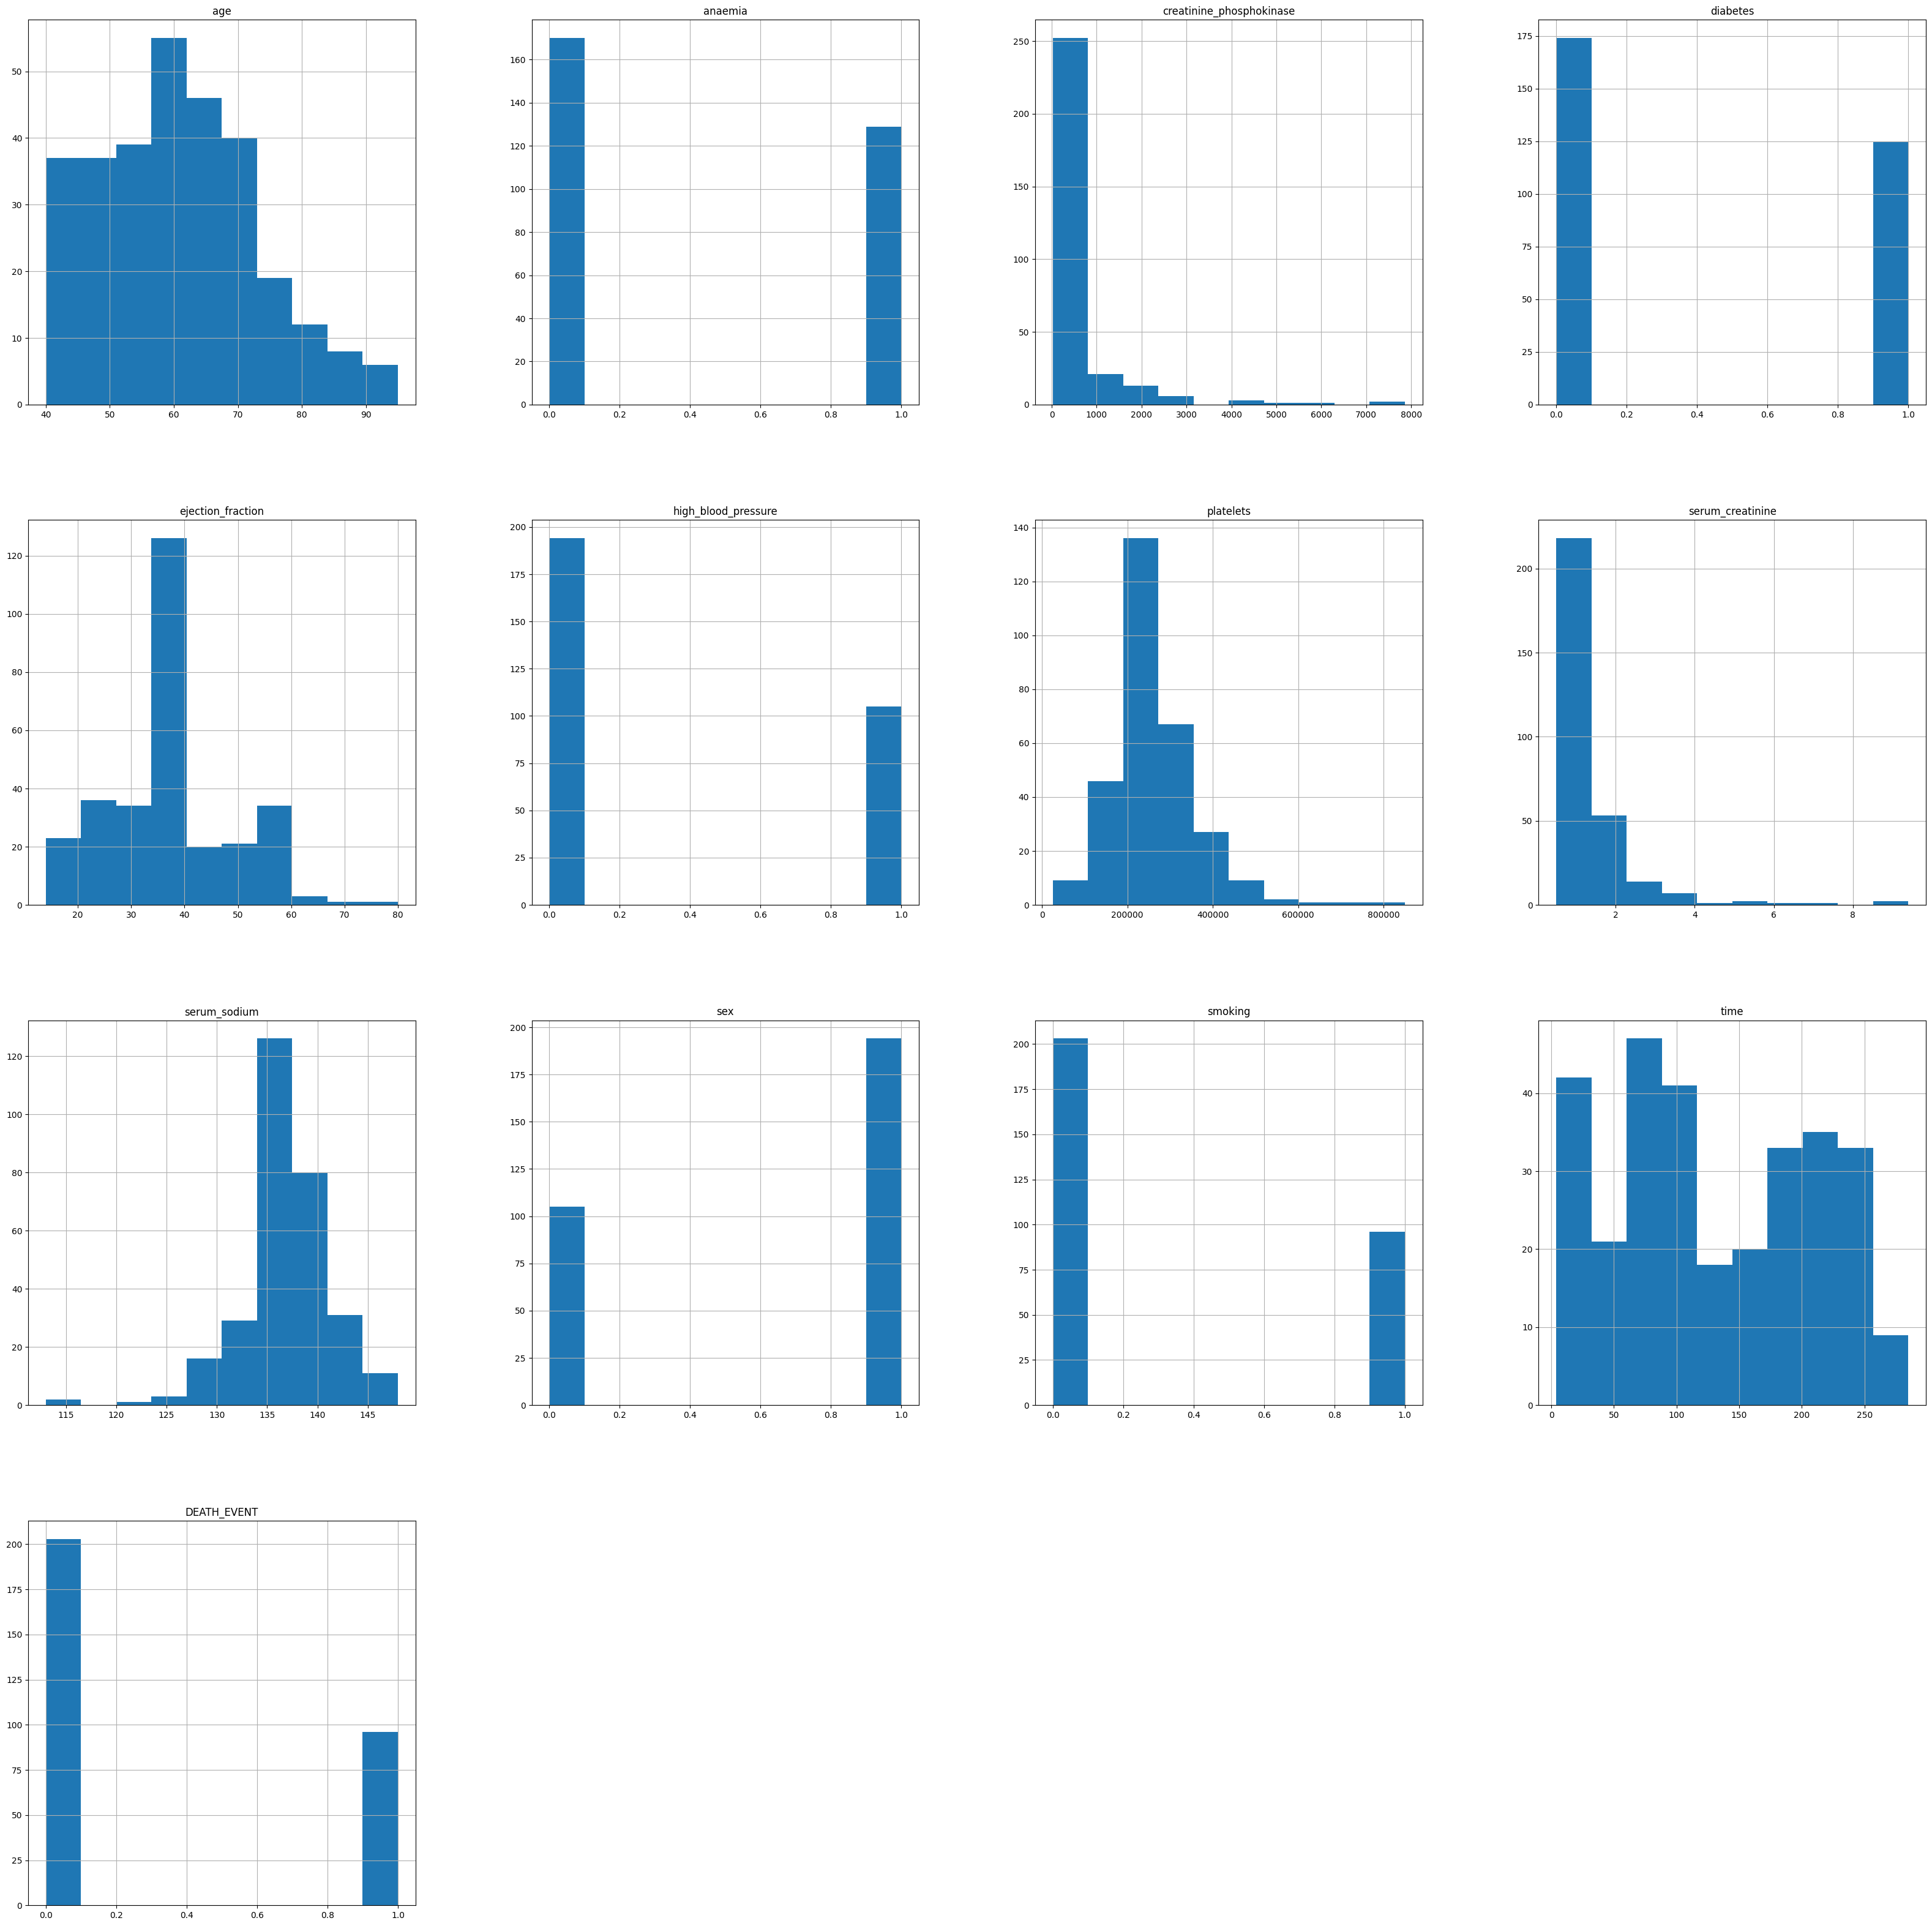

In [10]:
# creating histograms to visualize all the data
fig = plt.figure(figsize = (40,40))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = fig.gca()
data.hist(ax = ax)

**SPLIT** **DATA**

In [11]:
# Spliting data
x = data.drop(columns=['DEATH_EVENT'])
y = data['DEATH_EVENT']

In [12]:
#Checking if shapes of x and y are correct
data.shape, x.shape, y.shape

((299, 13), (299, 12), (299,))

In [13]:
#Spliting between training and testing set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**DEEP LEARNING MODEL**

In [15]:
# Preparing a model

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, BatchNormalization, Dropout
from keras.models import Sequential

In [16]:
model = Sequential([
    BatchNormalization(),
    Dense(12, input_shape=(x_train.shape[1],), activation='relu'),
    Dropout(0.2),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])

C:\Users\abhijat\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:73: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy',
             metrics=['accuracy'])

In [19]:
history = model.fit(x_train, y_train,
                   batch_size=16, epochs = 50,
                   validation_data=(x_test, y_test),
                   verbose=2)

Epoch 1/50


TypeError: 'NoneType' object is not callable

In [19]:
model.evaluate(x_test, y_test, batch_size=16)

4/4 [==============================] - 0s 3ms/step - loss: 0.4046 - accuracy: 0.8500


[0.4046412408351898, 0.8500000238418579]

Text(0.5, 1.0, 'loss function')

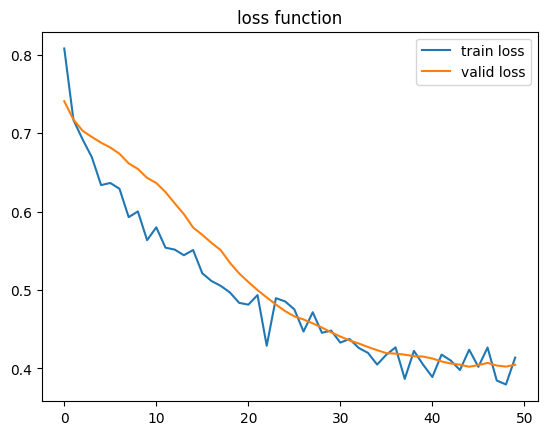

In [20]:
# Loss plot
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='valid loss')
plt.legend()
plt.title('loss function')

Text(0.5, 1.0, 'Accuracy')

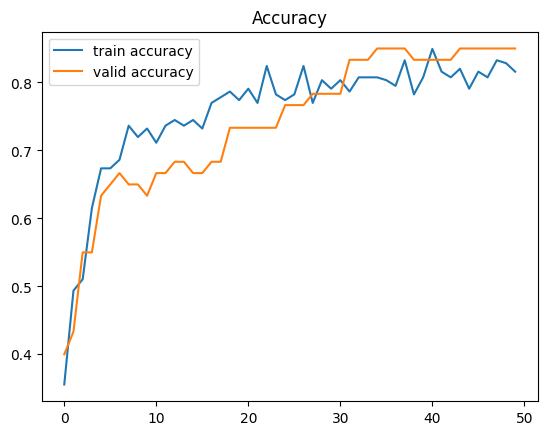

In [21]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='valid accuracy')
plt.legend()
plt.title('Accuracy')

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [23]:
# Metrics for testing data
accuracy_list=[]
y_pred = model.predict(x_test)
y_pred_rounded = np.round(y_pred).astype('int32')

accuracy = accuracy_score(y_test, y_pred_rounded)
precision = precision_score(y_test, y_pred_rounded)
recall = recall_score(y_test, y_pred_rounded)
accuracy_list.append(accuracy)
print("DEEP LEARNING MODEL")
print(f"Accuracy: {accuracy*100} %")
print(f"Precision: {precision*100} %")
print(f"Recall: {precision*100} %")

2/2 [==============================] - 0s 5ms/step
DEEP LEARNING MODEL
Accuracy: 85.0 %
Precision: 81.81818181818183 %
Recall: 81.81818181818183 %


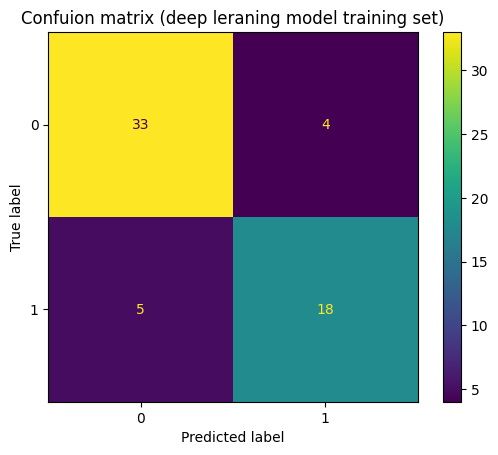

In [24]:
conf_matrix = confusion_matrix(y_test, y_pred_rounded)

conf_disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
conf_disp.plot()
plt.title('Confuion matrix (deep leraning model training set)')
plt.show()

**XG BOOST**

In [25]:
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators = 10, max_depth=12, subsample=0.7)
classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [26]:
y_pred = classifier.predict(x_test)
print(y_pred)

[1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1]


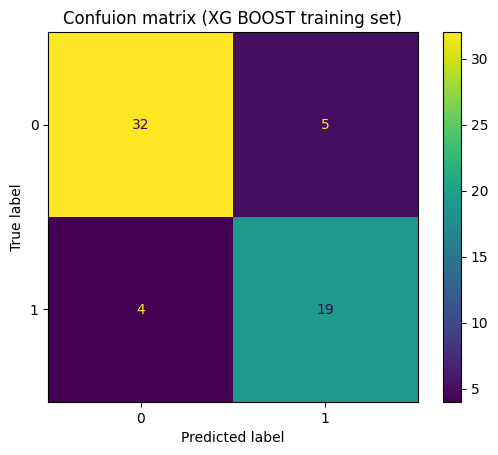

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
conf_disp = ConfusionMatrixDisplay(confusion_matrix=cm)
conf_disp.plot()
plt.title('Confuion matrix (XG BOOST training set)')
plt.show()

In [28]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy_list.append(accuracy)
print(f"Accuracy: {accuracy*100} %")
print(f"Precision: {precision*100} %")
print(f"Recall: {precision*100} %")

Accuracy: 85.0 %
Precision: 79.16666666666666 %
Recall: 79.16666666666666 %


In [29]:
print("XG BOOST")
print(classification_report(y_test,y_pred))

XG BOOST
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        37
           1       0.79      0.83      0.81        23

    accuracy                           0.85        60
   macro avg       0.84      0.85      0.84        60
weighted avg       0.85      0.85      0.85        60



**Logestic Regression**

In [30]:
from sklearn.linear_model import LogisticRegression, LinearRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [31]:
y_pred = model.predict(x_test)

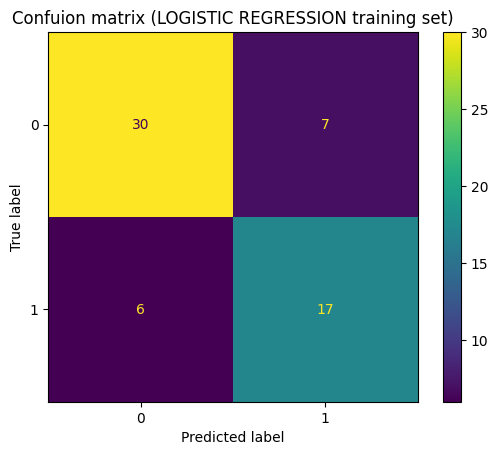

In [32]:
#from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
conf_disp = ConfusionMatrixDisplay(confusion_matrix=cm)
conf_disp.plot()
plt.title('Confuion matrix (LOGISTIC REGRESSION training set)')
plt.show()

In [33]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy_list.append(accuracy)
print(f"Accuracy: {accuracy*100} %")
print(f"Precision: {precision*100} %")
print(f"Recall: {precision*100} %")

Accuracy: 78.33333333333333 %
Precision: 70.83333333333334 %
Recall: 70.83333333333334 %


In [34]:
print("LOGISTIC REGRESSION")
print(classification_report(y_test,y_pred))

LOGISTIC REGRESSION
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        37
           1       0.71      0.74      0.72        23

    accuracy                           0.78        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.79      0.78      0.78        60



**DECISION TREE CLASSIFIER**

In [35]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_leaf_nodes = 3, random_state=0, criterion='entropy')
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=3, random_state=0)

In [36]:
y_predd = classifier.predict(x_test)
y_predd

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1])

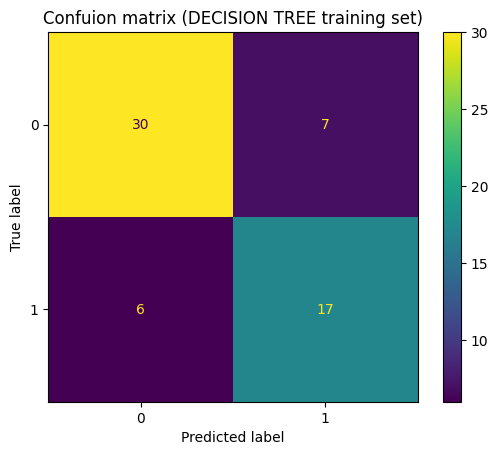

In [37]:
cm = confusion_matrix(y_test, y_pred)
conf_disp = ConfusionMatrixDisplay(confusion_matrix=cm)
conf_disp.plot()
plt.title('Confuion matrix (DECISION TREE training set)')
plt.show()

In [38]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy_list.append(accuracy)
print(f"Accuracy: {accuracy*100} %")
print(f"Precision: {precision*100} %")
print(f"Recall: {precision*100} %")

Accuracy: 78.33333333333333 %
Precision: 70.83333333333334 %
Recall: 70.83333333333334 %


In [39]:
print("DECISION TREE")
print(classification_report(y_test,y_pred))

DECISION TREE
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        37
           1       0.71      0.74      0.72        23

    accuracy                           0.78        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.79      0.78      0.78        60



In [40]:
name_list = ["Deep Learning", "XG BOOST", "Logestic Regression", "DecisionTree"]
print(name_list)
print(accuracy_list)

['Deep Learning', 'XG BOOST', 'Logestic Regression', 'DecisionTree']
[0.85, 0.85, 0.7833333333333333, 0.7833333333333333]


<ipython-input-41-0e10ac7a5d58>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




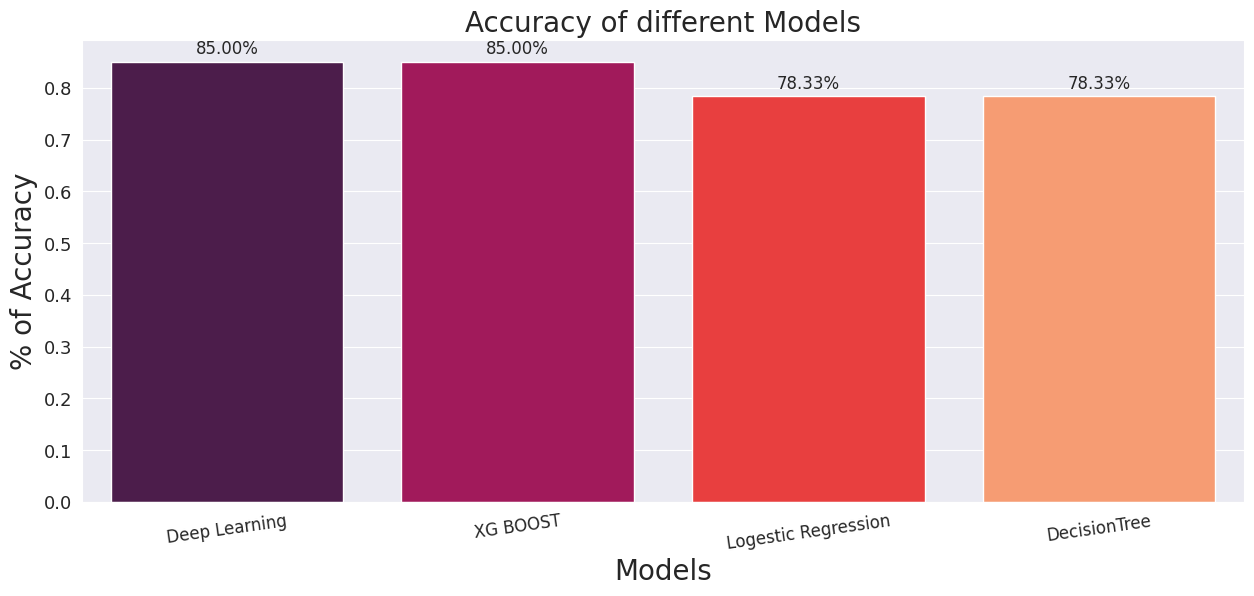

In [41]:
import seaborn as sns
plt.rcParams['figure.figsize']=15,6
sns.set_style("darkgrid")
ax = sns.barplot(x=name_list, y=accuracy_list, palette= "rocket", saturation=1)
plt.xlabel("Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'large')
plt.show()